<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/2.2.4%20Temporal%20Invariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Installing yfinance and getting the data...")
!pip install yfinance 1>/dev/null
from yfinance import download
import pandas as pd
import numpy as np ;
import matplotlib.pyplot as pl
from statsmodels.base.model import GenericLikelihoodModel
from datetime import datetime
zero,one,two,five,hundred=0e0,1e0,2e0,5e0,1e2 # some friendly numbers
half,GoldenRatio=one/two,(one+np.sqrt(five))/two

# get the daily returns of the S&P 500 
SPX=download('^GSPC','1957-03-01').dropna()
SPX['Return']=SPX['Adj Close'].pct_change()*hundred
SPX.index=pd.DatetimeIndex(SPX.index).to_period('D')
SPX.dropna(inplace=True)
SPX.loc[SPX["Volume"]==0,"Volume"]=np.nan
SPX

Installing yfinance and getting the data...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1.890000e+06,0.731595
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1.860000e+06,0.363141
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1.840000e+06,0.022610
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1.830000e+06,-0.045219
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1.630000e+06,-0.316669
...,...,...,...,...,...,...,...
2022-03-17,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4.174170e+09,1.234782
2022-03-18,4407.339844,4465.399902,4390.569824,4463.120117,4463.120117,6.681510e+09,1.166229
2022-03-21,4462.399902,4481.750000,4424.299805,4461.180176,4461.180176,3.961050e+09,-0.043466


,v1,n1,v2,n2,F,p
Date,,,,,,
1958,0.320143,252,0.707628,210.0,0.452418,1.022671e-09
1959,0.350320,253,0.320143,252.0,1.094259,7.626153e-01
1960,0.428305,252,0.350320,253.0,1.222611,9.445484e-01
1961,0.406079,250,0.428305,252.0,0.948107,3.366984e-01
1962,1.085471,252,0.406079,250.0,2.673056,1.000000e+00
...,...,...,...,...,...,...
2018,1.153792,251,0.177373,251.0,6.504876,1.000000e+00
2019,0.617271,252,1.153792,251.0,0.534993,4.405485e-07
2020,4.704339,253,0.617271,252.0,7.621188,1.000000e+00


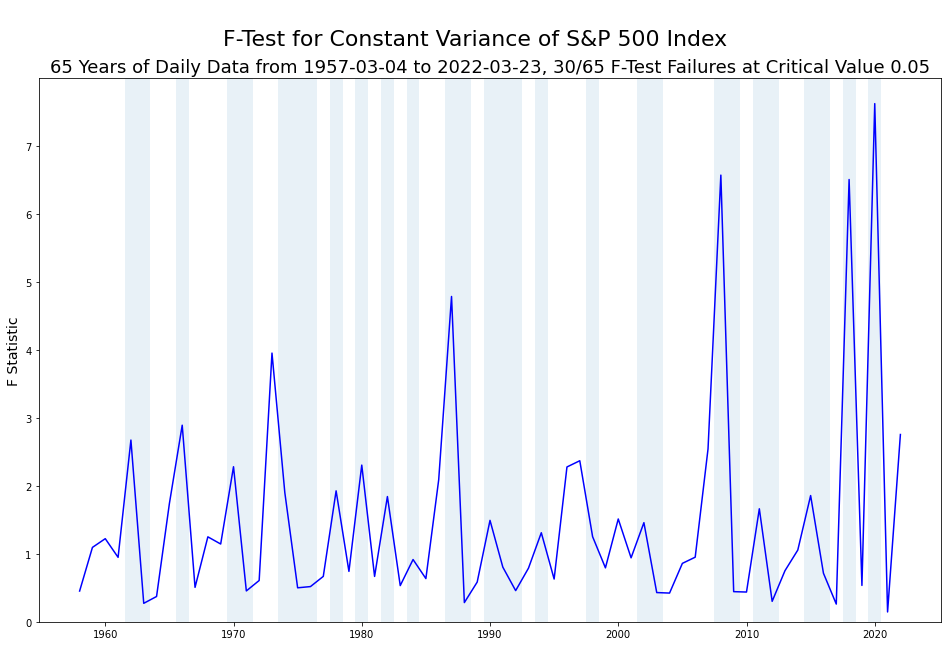

In [34]:
# year on year F statistics for variance of returns
from scipy.stats import f
variance=pd.DataFrame({"v1":SPX["Return"].groupby(SPX.index.year).var(),"n1":SPX["Return"].groupby(SPX.index.year).count()})
variance["v2"]=variance["v1"].shift()
variance["n2"]=variance["n1"].shift()
variance["F"]=variance["v1"]/variance["v2"]
variance["p"]=list(map(lambda i:f.cdf(variance.loc[i,"F"],variance.loc[i,"n1"],variance.loc[i,"n2"]),variance.index))
variance.dropna(inplace=True)
nt,alpha=variance.shape[0],0.05
nf=variance[variance["p"]<=alpha].shape[0]
display(variance)

# Figure 2.5
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
variance['F'].plot(ax=plot,color='blue')
figure.suptitle('\nF-Test for Constant Variance of S&P 500 Index',fontsize=22)
plot.set_title('%d Years of Daily Data from %s to %s, %d/%d F-Test Failures at Critical Value %.2f' % (variance.shape[0],SPX.index[0],SPX.index[-1],nf,nt,alpha),fontsize=18)
plot.set_ylabel("F Statistic",fontsize=14)

for year in variance.index[variance["p"]<=alpha][1:]:
    plot.axvspan(year-1.5,year-0.5,alpha=0.1)

plot.set_xlabel(None)
plot.set_ylim(0,None);